#  **Bellabeat Google Case Study**

Link to dataset on __[Kaggle](https://www.kaggle.com/datasets/arashnic/fitbit/code)__

This case study is a summary of my skills acquired during the Google Data Analysis course.  It is a representation of my understanding what the data analysis is and how to analize datasets in order to get the best posssible insight.

For simplicity, I didn't use R, SQL, Google Sheets, or Tableau, which were part of the tools for data analysis learned in the course. Instead, I used Python, which allowed me to easily perform all of the operations needed without complicating the arrangement of the document.

### 1. **Ask**

Guiding questions:
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat's marketing strategy?

The stakeholders for the analysis are:
* Urška Sršen
* Sando Mur
* Bellabeat marketing analytics team

To create the best marketing strategy, which will help develop a strong market position for Bellabeat, we should consider what habits and daily routines smart device users have.
***

### 2. **Prepare**

##### **Data Description**

0. ***dailyActivity***: daily summary of types of activities done by customers
1. ***heartrate_seconds***: measured heart rate of customers across the day
2. ***hourlyCalories***: calories burned by the hour
3. ***hourlyIntensieties***: intensity of exercise by the hour
4. ***hourlySteps***: Steps by hour
5. ***minuteCaloriesNarrow***: Calories burnt in each minute
6. ***minuteIntensitiesNarrow***: intensity in each minute
7. ***minuteMETsNarrow***: METs in each minute
8. ***minuteSleep***: Length and type of sleep
9. ***minuteStepsNarrow***: Steps by minute
10. ***weightLogInfo***: Logs about changes in the weight of customers

The database contains information about around 30 users over a timeframe of 2 months. This means that conclusions based on this data might be imprecise, unrepresentative or biased. To be sure about analysis it would be necessary to gather more data and compare it with this research.

In [437]:
import pandas as pd
import matplotlib.pyplot as plt

In [438]:
ds = [  'dailyActivity',
        'heartrate_seconds',
        'hourlyCalories',
        'hourlyIntensities',
        'hourlySteps',
        'minuteCaloriesNarrow',
        'minuteIntensitiesNarrow',
        'minuteMETsNarrow',
        'minuteSleep',
        'minuteStepsNarrow',
        'weightLogInfo']


dfs = {}
for dataset in ds:
    dfs.update( {dataset : pd.read_csv(dataset + "_merged.csv")})

As first step of cleaning the data we will check structure of every dataset

In [439]:
for i in range(len(ds)):
    dfs[ds[i]].info()
    print("-"*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   TrackerDistance           457 non-null    float64
 5   LoggedActivitiesDistance  457 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  457 non-null    float64
 8   LightActiveDistance       457 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       457 non-null    int64  
 12  LightlyActiveMinutes      457 non-null    int64  
 13  SedentaryMinutes          457 non-null    int64  
 14  Calories  

### 3. **Process**

We will change *Id* collumns type from int to string and every date and time related collumns to datetime

In [440]:
for i in range(len(ds)):
    dfs[ds[i]]['Id'] = dfs[ds[i]]['Id'].astype(str)
dfs[ds[0]]["ActivityDate"] = pd.to_datetime(dfs[ds[0]]["ActivityDate"], format = '%m/%d/%Y') 
dfs[ds[1]]["Time"] = pd.to_datetime(dfs[ds[1]]["Time"], format = "%m/%d/%Y %I:%M:%S %p")
dfs[ds[2]]["ActivityHour"] = pd.to_datetime(dfs[ds[2]]["ActivityHour"], format = "%m/%d/%Y %I:%M:%S %p")
dfs[ds[3]]["ActivityHour"] = pd.to_datetime(dfs[ds[3]]["ActivityHour"], format = "%m/%d/%Y %I:%M:%S %p")
dfs[ds[4]]["ActivityHour"] = pd.to_datetime(dfs[ds[4]]["ActivityHour"], format = "%m/%d/%Y %I:%M:%S %p")
dfs[ds[5]]["ActivityMinute"] = pd.to_datetime(dfs[ds[5]]["ActivityMinute"], format = "%m/%d/%Y %I:%M:%S %p")
dfs[ds[6]]["ActivityMinute"] = pd.to_datetime(dfs[ds[6]]["ActivityMinute"], format = "%m/%d/%Y %I:%M:%S %p")
dfs[ds[7]]["ActivityMinute"] = pd.to_datetime(dfs[ds[7]]["ActivityMinute"], format = "%m/%d/%Y %I:%M:%S %p")
dfs[ds[8]]["date"] = pd.to_datetime(dfs[ds[8]]["date"], format = "%m/%d/%Y %I:%M:%S %p")
dfs[ds[9]]["ActivityMinute"] = pd.to_datetime(dfs[ds[9]]["ActivityMinute"], format = "%m/%d/%Y %I:%M:%S %p")
dfs[ds[10]]["Date"] = pd.to_datetime(dfs[ds[10]]["Date"], format = "%m/%d/%Y %I:%M:%S %p")

Cleaning from duplicates

In [441]:
for i in range(len(ds)):
    dfs[ds[i]] = dfs[ds[i]].drop_duplicates()

### 4. **Analize & Share** 

In our analysis we will investigate data in order to find out what exercise habits do users have. We will:
1. Divide users into groups depending on their daily activity.

1. Check what day of the week is the most active for each group.

1. Finally investigate what time of the day is the most active for users.
    >Used datasets:
    * ***dailyActivity***
    * ***minuteStepsNarrow***

Gained insights might be used for marketing purposes to schedule advertisements, promotions, and notifications during peak activity times to capture users' attention when they are most engaged. 

#### 1. Divide users into groups depending on their daily activity

In [442]:
da = dfs['dailyActivity']
ms = dfs['minuteStepsNarrow']

In [443]:
da['Weekday'] = da['ActivityDate'].dt.day_name()

In [444]:
mean_of_steps_per_User = da.groupby('Id')['TotalSteps'].mean().reset_index()

From now users will be divided into 3 groups:
* Not Active - Users who almost don't move physically
* Slightly Active - Users with moderate involvement in physical exercises
* Active - Physically active users

From now, when these phrases are used, they will refer to these definitions.

In [445]:
activity_types = {
    "Not Active" : mean_of_steps_per_User[mean_of_steps_per_User["TotalSteps"] <= 4000],
    "Slightly Active" : mean_of_steps_per_User[(mean_of_steps_per_User["TotalSteps"] <= 10000) & (mean_of_steps_per_User["TotalSteps"] > 4000)],
    "Active" : mean_of_steps_per_User[mean_of_steps_per_User["TotalSteps"] > 10000]   
}

In [464]:
length_dict = {key: len(value) for key, value in activity_types.items()}

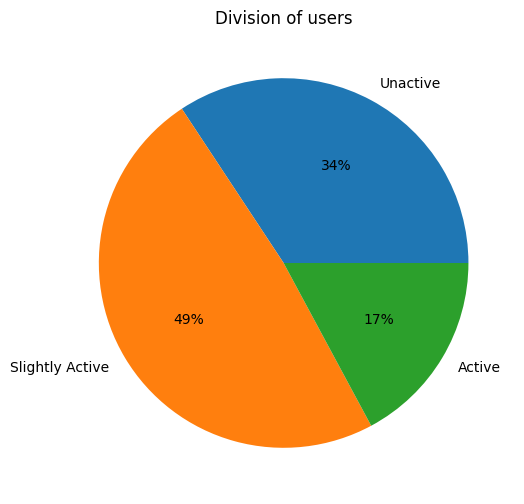

In [481]:
plt.figure(figsize=(6,6))
plt.pie(length_dict.values(),labels = length_dict.keys(),autopct='%1.0f%%')
plt.title("Division of users")
plt.show()

#### 2. Check what day of the week is the most active for each group

In [446]:
activity_in_week_of_each_user = da.groupby(['Id','Weekday'])["TotalSteps"].mean().reset_index()

In [455]:
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
type_of_user = ['Not Active','Slightly Active', 'Active']

In [456]:
activity_in_week_of_each_user['Weekday'] = pd.Categorical(activity_in_week_of_each_user['Weekday'], categories=week, ordered=True)
activity_in_week_of_each_user = activity_in_week_of_each_user.sort_values('Weekday')

/var/folders/t0/sq_1cnpj20zcbxrp_r9hny540000gn/T/ipykernel_54152/2301390468.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_of_steps_per_weekday = activity_in_week_of_each_user[ activity_in_week_of_each_user['Id'].isin( activity_types[type_of_user[i]]['Id'] ) ].groupby('Weekday')['TotalSteps'].mean().reset_index()
/var/folders/t0/sq_1cnpj20zcbxrp_r9hny540000gn/T/ipykernel_54152/2301390468.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_of_steps_per_weekday = activity_in_week_of_each_user[ activity_in_week_of_each_user['Id'].isin( activity_types[type_of_user[i]]['Id'] ) ].groupby('Weekday')['

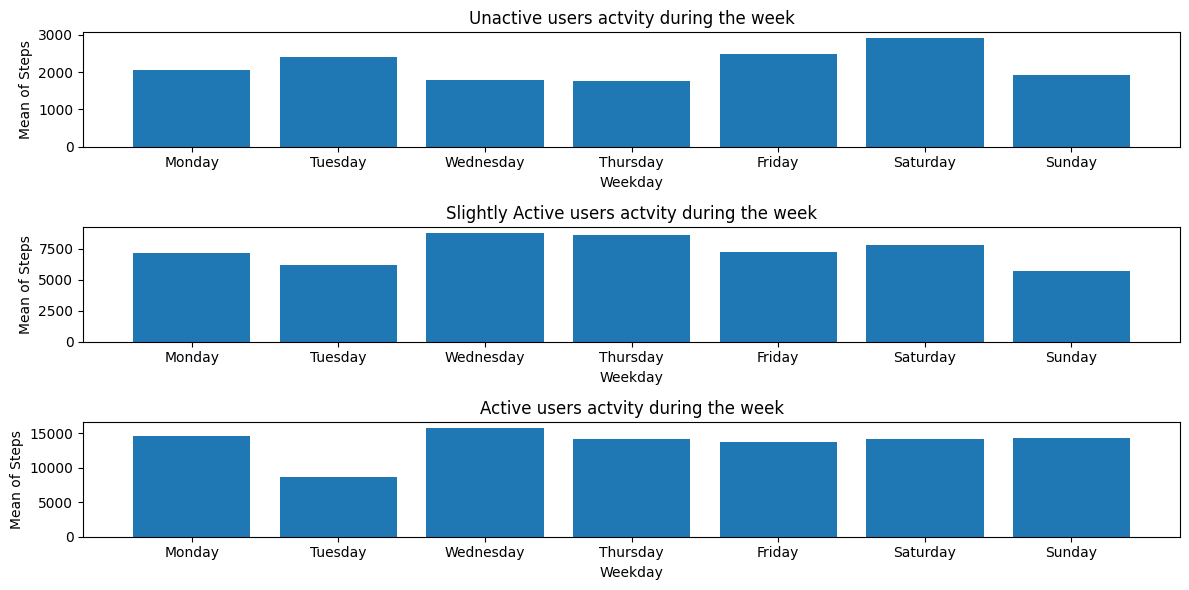

In [458]:
plt.figure(figsize=(12,6))

for i in range(3):
    plt.subplot(3,1,i+1)
    
    mean_of_steps_per_minute_in_weekday = activity_in_week_of_each_user[ activity_in_week_of_each_user['Id'].isin( activity_types[type_of_user[i]]['Id'] ) ].groupby('Weekday')['TotalSteps'].mean().reset_index()
    
    plt.bar(mean_of_steps_per_minute_in_weekday['Weekday'],mean_of_steps_per_minute_in_weekday['TotalSteps'])
    plt.xlabel("Weekday")
    plt.ylabel("Mean of Steps")
    plt.title(f'{type_of_user[i]} users activity during the week')

plt.tight_layout()
plt.show()
    

#### 3. Investigate what time of the day is the most active for users

In [450]:
ms['Time'] = ms['ActivityMinute'].dt.time
ms['Weekday'] = ms['ActivityMinute'].dt.weekday

In [451]:
g = ms.groupby(['Id','Weekday','Time'])['Steps'].mean().reset_index()

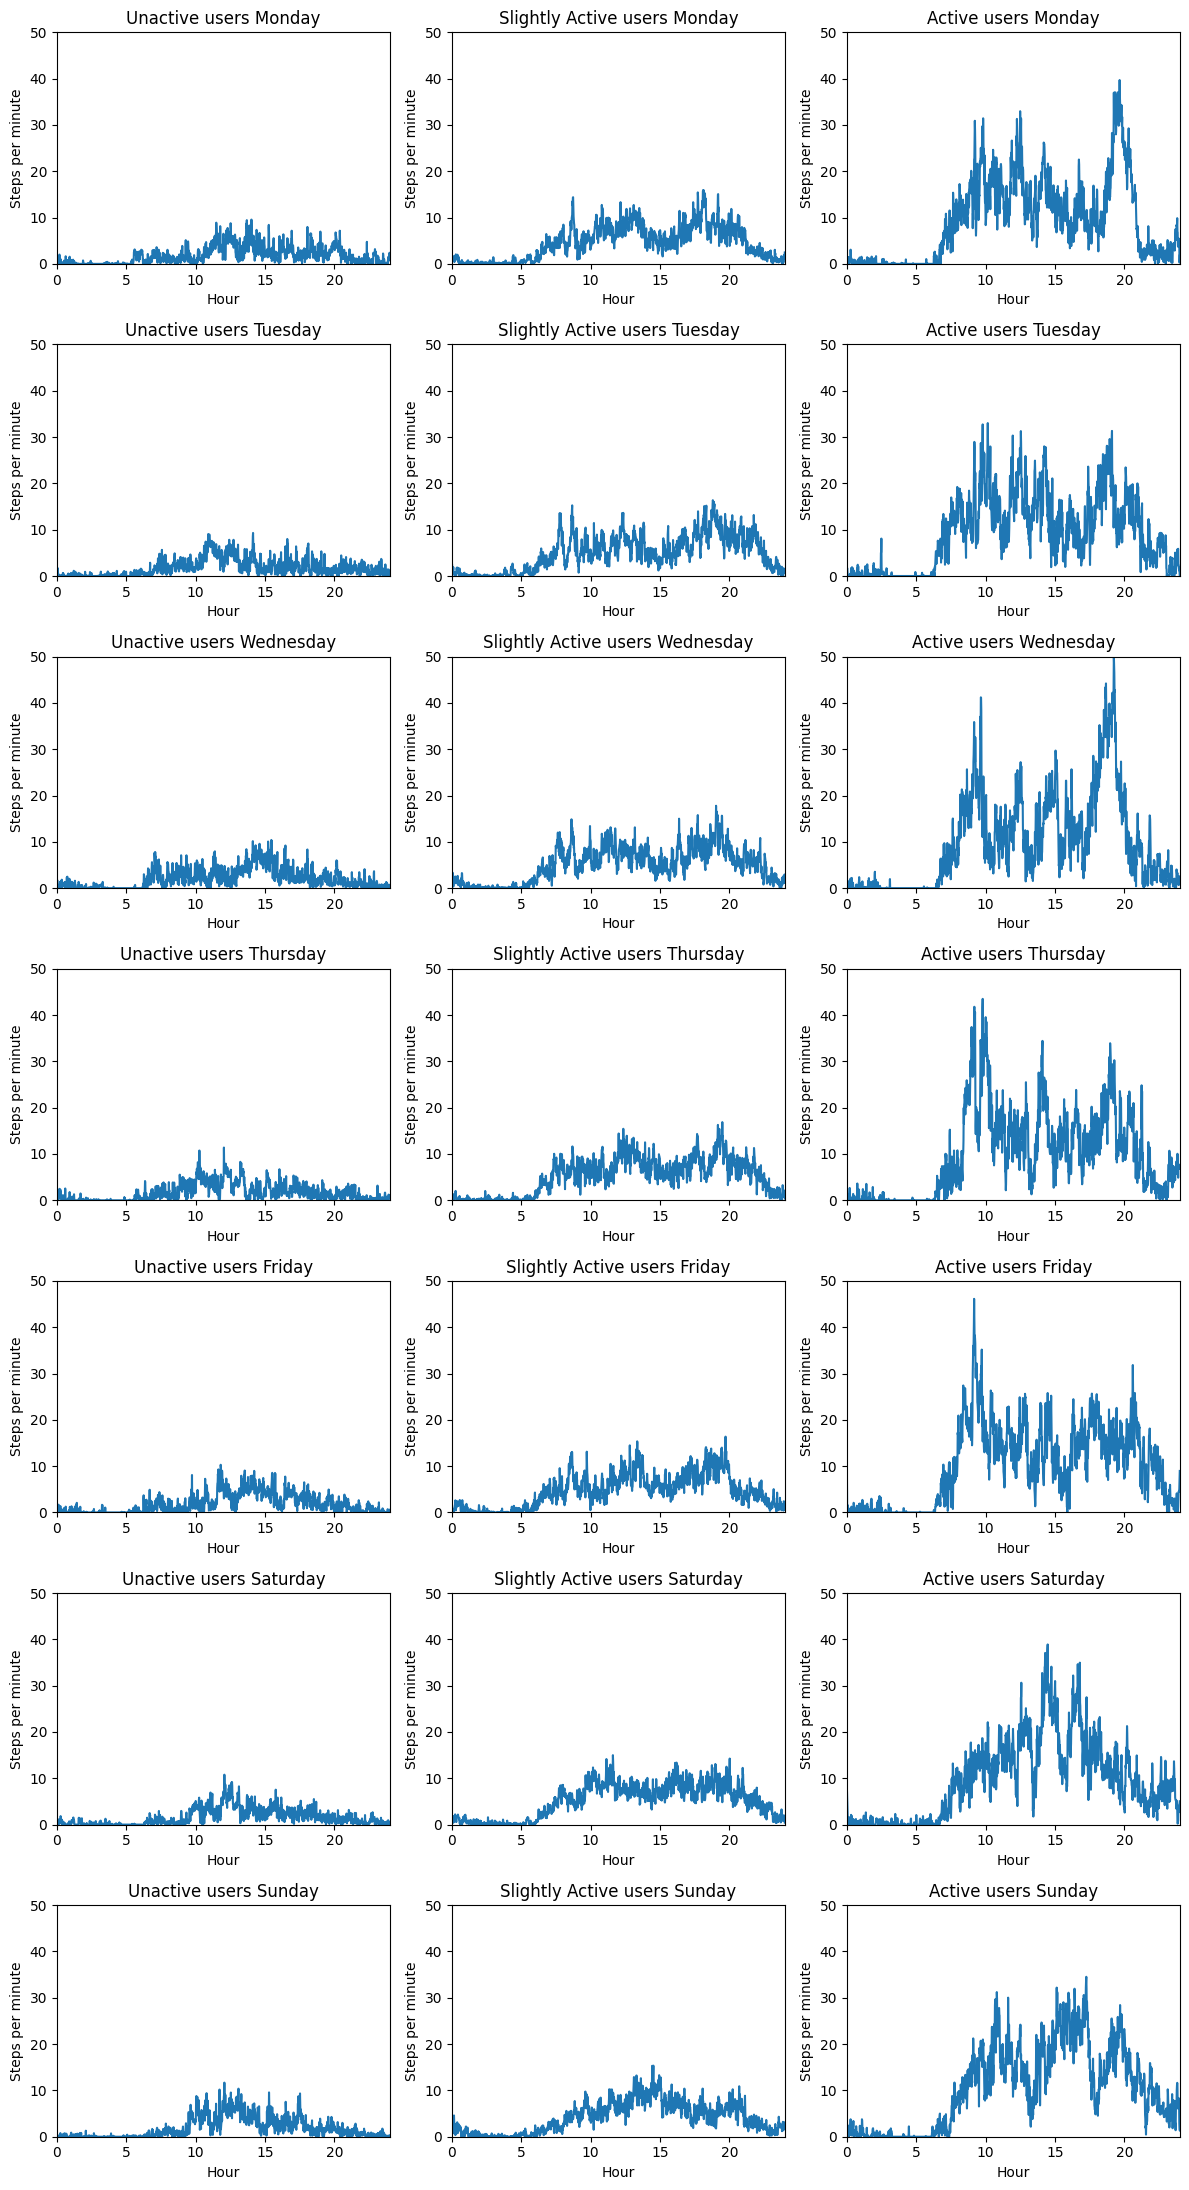

In [459]:
def time_to_hours(t):
    return t.hour + t.minute / 60.0

plt.figure(figsize=(12,22))
for j in range(7):

    daily_activity_hours_of_each_user_in_weekday = g[g['Weekday'] == j].groupby(['Id','Time'])['Steps'].mean().reset_index()

    for i in range(3):
        plt.subplot(7,3,i+j*3+1)
        
        mean_of_steps_per_minute_in_weekday = daily_activity_hours_of_each_user_in_weekday[daily_activity_hours_of_each_user_in_weekday['Id'].isin(activity_types[type_of_user[i]]['Id'])].groupby('Time')['Steps'].mean().reset_index()

        
        plt.plot(mean_of_steps_per_minute_in_weekday['Time'].apply(time_to_hours),mean_of_steps_per_minute_in_weekday['Steps'])
        plt.xlabel("Hour")
        plt.ylabel("Steps per minute")
        plt.title(f'{type_of_user[i]} users {w[j]}')
        plt.ylim(0,50)
        plt.xlim(0,24)
plt.tight_layout()
plt.show()

### 5. **Act** 

Conclusions: 
* Slightly active users and active users tend to exercise more in the hours before 10:00 and before 20:00. 
* This trend is disrupted in weekends, when a large group of people doesn't work and have time to exercise within the typical work hours. 
* Exercise habits of not active users are the same across the week.
* Active users have the most noticeable differences in their activity across the day. This proves, that they have more organized daily routine, what may be used for marketing purposes.

It should be also considered that active users group is much smaller than the rest. This means that marketing strategy should be more focused on the remaining two groups.

To make analysis more insightful we should gather more data from a bigger sample over a longer period of time. Getting information, which group of users is more likely to buy other products could make product targeting more precise.